# Support Vector Machine (SVR)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

## Import the Dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\moshe\Documents\Mechine Learning\SVR\Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.shape

(10, 3)

In [5]:
X = dataset.iloc[:, 1:2].values

In [6]:
y = dataset.iloc[:, 2].values

In [7]:
X[0:5]

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [8]:
y[0:5]

array([ 45000,  50000,  60000,  80000, 110000], dtype=int64)

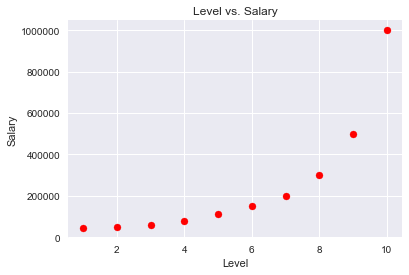

In [9]:
plt.scatter(X, y, color='red');
plt.title('Level vs. Salary');
plt.xlabel('Level');
plt.ylabel('Salary');
plt.show()

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_X = StandardScaler()

In [12]:
X = sc_X.fit_transform(X)

C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [13]:
sc_y = StandardScaler()

In [14]:
y = sc_y.fit_transform(y)

C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


## Fit an SVM model to the data

In [15]:
from sklearn.svm import SVR

In [16]:
regressor = SVR(kernel='rbf')

In [17]:
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predict a new value

In [24]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([6.5]))))

C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [25]:
y_pred

array([ 170370.0204065])

## Visualize the SVR results

In [31]:
X_grid = np.arange(min(X), max(X), 0.1)

In [32]:
X_grid = X_grid.reshape((len(X_grid), 1))

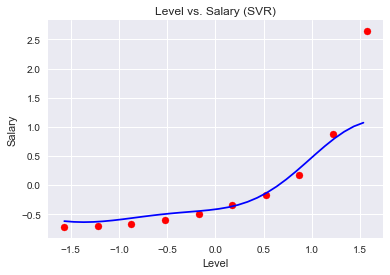

In [33]:
plt.scatter(X, y, color='red');
plt.plot(X_grid, regressor.predict(X_grid), color='blue');
plt.title('Level vs. Salary (SVR)');
plt.xlabel('Level');
plt.ylabel('Salary');
plt.show()